(256, 256)

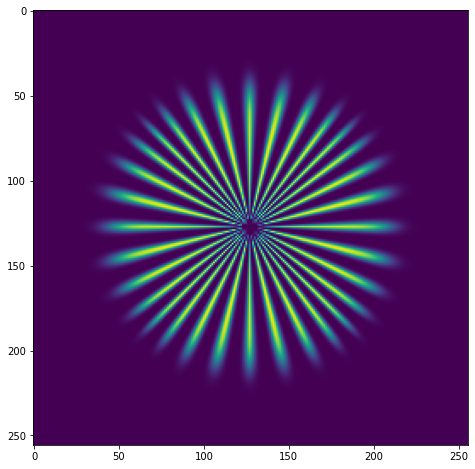

In [23]:
from skimage.io import imread
from tnia.plotting.plt_helper import imshow2d

input_name = "D:\\images\\tnia-python-images\\notebooks\\deconvolution\\sinuosidal siemens star\\ref.tif"
#input_name = "D:\\images\\tnia-python-images\\notebooks\\deconvolution\\wheel\\wheel.tif"

star = imread(input_name)

fig=imshow2d(star, 8, 8)
img=star.astype('float32')
img.shape

In [30]:
import numpy as np
from numpy.fft import fftn, ifftn, fftshift
from numpy.random import poisson

def richardson_lucy_np(image, psf, num_iters, save_interval=1):
    estimates=[]
    
    otf = fftn(fftshift(psf))
    otf_ = np.conjugate(otf)    
    estimate = np.ones(image.shape)/image.sum()

    for i in range(num_iters):
        #print(i)
        
        reblurred = ifftn(fftn(estimate) * otf)
        ratio = image / (reblurred + 1e-30)
        estimate = estimate * (ifftn(fftn(ratio) * otf_)).astype(float)
        
        if i%save_interval==0:
            estimates.append(estimate)
            
        
    return estimate

(256, 256)


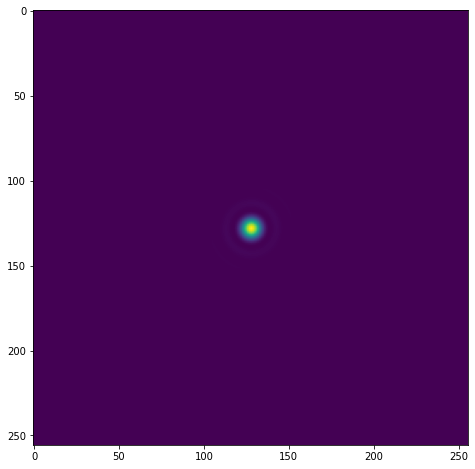

In [31]:
from tnia.deconvolution.psfs import paraxial_psf

n=img.shape[0]
wavelength = 500
na=1.4
pixel_size = 20

psf=paraxial_psf(n, wavelength, na, pixel_size)

print(psf.shape)
fig=imshow2d(psf,8,8)

In [32]:
from tnia.deconvolution.forward import forward

float32 float32 float32
0.99994814 677.0


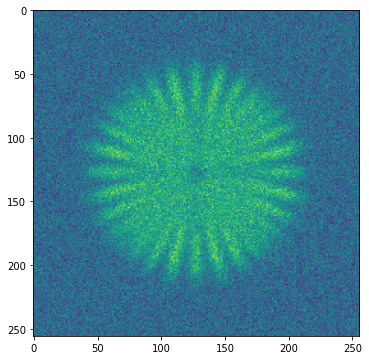

In [33]:
img = forward(star, psf,100.,500., True).astype('float32')
fig = imshow2d(img)
print(star.dtype, img.dtype, psf.dtype)
print(star.max(), img.max())

C:\Users\bnort\AppData\Local\Temp\ipykernel_7360\2299206456.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
  estimate = estimate * (ifftn(fftn(ratio) * otf_)).astype(float)


float32 float32 float64
409.0 677.0
478.91580998017866 646.7216009307843


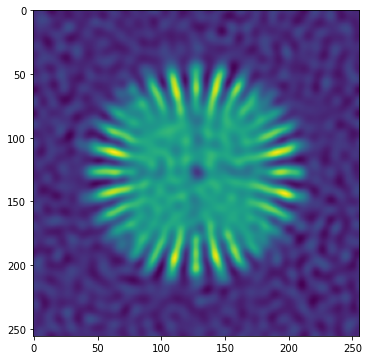

In [35]:
decon10 = richardson_lucy_np(img.astype('float64'), psf.astype('float64'), 10)
decon100 = richardson_lucy_np(img.astype('float64'), psf.astype('float64'), 100)
decon1000 = richardson_lucy_np(img.astype('float64'), psf.astype('float64'), 1000)
#decon10000 = richardson_lucy_np(img.astype('float64'), psf.astype('float64'), 10000)


print(img.dtype, psf.dtype, decon10.dtype)
print(img.min(), img.max())
print(decon10.min(), decon10.max())
fig = imshow2d(decon10)

In [29]:
from tnia.plotting.plt_helper import imshow_multi2d
from tnia.nd.ndutil import centercrop2d
from skimage.filters import threshold_otsu
n=250
ims=[centercrop2d(star, (n,n)), centercrop2d(img,(n,n)), centercrop2d(decon10,(n,n)),centercrop2d(decon100,(n,n)),centercrop2d(decon1000,(n,n)),centercrop2d(decon10000,(n,n))]
titles=['truth','img','decon 10 iter','decon 100 iter','decon 1000 iter','decon 10000 iter']

print('Slightly Undersampled Medium SNR')
fig=imshow_multi2d(ims, titles, 1,6, width=15)
otsus=[x>threshold_otsu(x) for x in ims]
titles=['Otsu truth','Otsu img','Otsu decon 10 iter','Otsu decon 100 iter','Otsu decon 1000 iter', 'Otsu decon 10000']
fig=imshow_multi2d(otsus, titles, 1,6,width=15)

AttributeError: 'list' object has no attribute 'shape'

In [384]:
import napari
viewer=napari.Viewer()
for im in ims:
    viewer.add_image(im)

for otsu in otsus:
    viewer.add_labels(otsu)

Exception in callback BaseAsyncIOLoop._handle_events(6680, 1)
handle: <Handle BaseAsyncIOLoop._handle_events(6680, 1)>
Traceback (most recent call last):
  File "C:\Users\bnort\miniconda3\envs\elephas\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\bnort\miniconda3\envs\elephas\lib\site-packages\tornado\platform\asyncio.py", line 189, in _handle_events
    handler_func(fileobj, events)
  File "C:\Users\bnort\miniconda3\envs\elephas\lib\site-packages\zmq\eventloop\zmqstream.py", line 452, in _handle_events
    self._handle_recv()
  File "C:\Users\bnort\miniconda3\envs\elephas\lib\site-packages\zmq\eventloop\zmqstream.py", line 481, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\bnort\miniconda3\envs\elephas\lib\site-packages\zmq\eventloop\zmqstream.py", line 431, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\bnort\miniconda3\envs\elephas\lib\site-packages\jupyter_client\threaded.py", l

9

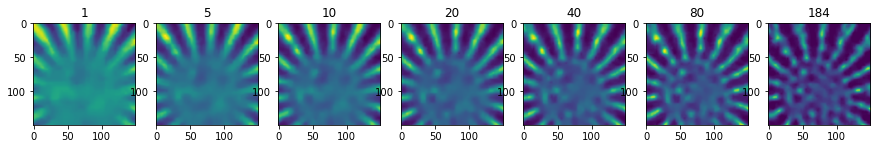

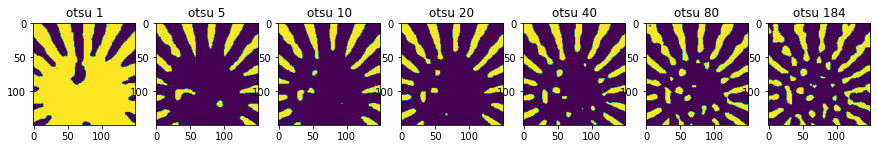

In [380]:
iters=[1,5,10,20,40,80,184]
ims=[imread('D:\\images\\tnia-python-images\\notebooks\\deconvolution\\whendowestop\\'+str(iter)+'iter.tif') for iter in iters]
ims=[im[:,:,0] for im in ims]
ims=[centercrop2d(im,(150,150)) for im in ims]
titles=['1','5','10','20','40','80','184']    
fig=imshow_multi2d(ims, titles, 1,7, width=15)

otsus=[x>threshold_otsu(x) for x in ims]
titles=['otsu 1','otsu 5','otsu 10','otsu 20','otsu 40','otsu 80','otsu 184']    
fig=imshow_multi2d(otsus, titles, 1,7,width=15)

In [271]:
ims[0].shape

(399, 411, 3)

In [378]:
len(ims)

7

In [379]:
ims[0].shape

(399, 411, 3)

In [18]:
decon100 = richardson_lucy_np(img.astype('float64'), psf.astype('float64'), 100)

C:\Users\bnort\AppData\Local\Temp\ipykernel_7360\3948508859.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
  estimate = estimate * (ifftn(fftn(ratio) * otf_)).astype(float)


In [19]:
fig=imshow_multi2d(estimates, titles, 1,5,width=15, height=9)

NameError: name 'estimates' is not defined

In [20]:
fig=imshow_multi2d(estimates, titles, 1,5,width=15, height=9)

NameError: name 'estimates' is not defined

In [21]:
len(titles)

NameError: name 'titles' is not defined

In [22]:
len(estimates)

NameError: name 'estimates' is not defined